In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv('product_hierarchy.csv')
df

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,NaN,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917
...,...,...,...,...,...,...,...,...,...,...
694,P0744,2.0,7.0,7.0,NaN,H03,H0311,H031108,H03110802,H0311080202
695,P0745,NaN,NaN,NaN,cluster_0,H02,H0209,H020908,H02090804,H0209080422
696,P0746,1.0,1.0,1.0,cluster_0,H03,H0314,H031407,H03140702,H0314070202
697,P0747,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [22]:
#Task 6 – Cluster-wise Product Trend (Modified Monthly Sales Trend)
df['cluster_id']=df['cluster_id'].fillna('Unknown')
df['cluster_id']

0        Unknown
1      cluster_5
2      cluster_0
3      cluster_3
4      cluster_9
         ...    
694      Unknown
695    cluster_0
696    cluster_0
697    cluster_0
698    cluster_0
Name: cluster_id, Length: 699, dtype: object

In [23]:
cluster_summary = df.groupby('cluster_id')[['product_length', 'product_depth', 'product_width']].mean().reset_index()
cluster_summary

,cluster_id,product_length,product_depth,product_width
0,Unknown,6.306250,16.708163,12.118367
1,cluster_0,7.475799,18.265148,13.989294
2,cluster_1,8.325000,26.225000,8.450000
3,cluster_2,6.991667,18.933333,9.483333
4,cluster_3,5.741935,16.651613,12.448387
5,cluster_4,6.486111,17.372222,12.450000
6,cluster_5,6.030769,16.115385,15.030769
7,cluster_6,9.760714,28.650000,16.471429
8,cluster_7,3.280000,15.470000,7.840000
9,cluster_8,5.392857,16.114286,8.728571


In [24]:
cluster_summary['avg_size'] = cluster_summary[['product_length', 'product_depth', 'product_width']].mean(axis=1)
cluster_summary['avg_size']

0     11.710927
1     13.243414
2     14.333333
3     11.802778
4     11.613978
5     12.102778
6     12.392308
7     18.294048
8      8.863333
9     10.078571
10    13.340426
Name: avg_size, dtype: float64

In [25]:
cluster_summary = cluster_summary.sort_values('avg_size', ascending=False)
cluster_summary

,cluster_id,product_length,product_depth,product_width,avg_size
7,cluster_6,9.760714,28.650000,16.471429,18.294048
2,cluster_1,8.325000,26.225000,8.450000,14.333333
10,cluster_9,7.646809,19.276596,13.097872,13.340426
1,cluster_0,7.475799,18.265148,13.989294,13.243414
6,cluster_5,6.030769,16.115385,15.030769,12.392308
5,cluster_4,6.486111,17.372222,12.450000,12.102778
3,cluster_2,6.991667,18.933333,9.483333,11.802778
0,Unknown,6.306250,16.708163,12.118367,11.710927
4,cluster_3,5.741935,16.651613,12.448387,11.613978
9,cluster_8,5.392857,16.114286,8.728571,10.078571


C:\Users\CM\AppData\Local\Temp\ipykernel_13708\2194728028.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cluster_summary, x='cluster_id', y='avg_size', palette='coolwarm')


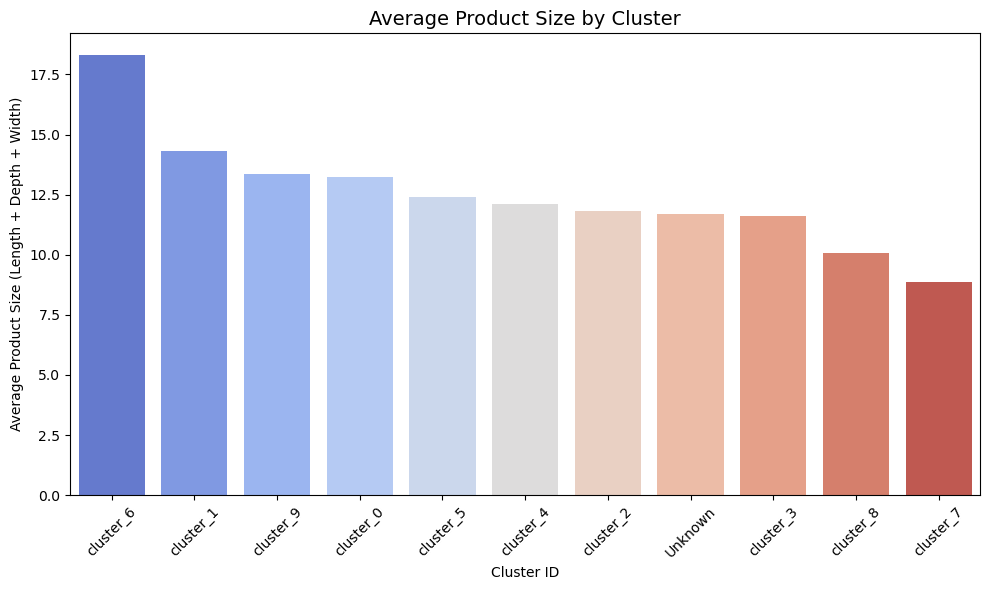

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(data=cluster_summary, x='cluster_id', y='avg_size', palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Average Product Size by Cluster', fontsize=14)
plt.xlabel('Cluster ID')
plt.ylabel('Average Product Size (Length + Depth + Width)')
plt.tight_layout()
plt.show()

In [27]:
#Task 7 – Hierarchy-wise Product Size Behavior
df = df.dropna(subset=['hierarchy1_id'])
df

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
0,P0000,5.0,20.0,12.0,Unknown,H00,H0004,H000401,H00040105,H0004010534
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028
3,P0004,2.0,13.0,4.0,cluster_3,H03,H0314,H031405,H03140500,H0314050003
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917
...,...,...,...,...,...,...,...,...,...,...
694,P0744,2.0,7.0,7.0,Unknown,H03,H0311,H031108,H03110802,H0311080202
695,P0745,NaN,NaN,NaN,cluster_0,H02,H0209,H020908,H02090804,H0209080422
696,P0746,1.0,1.0,1.0,cluster_0,H03,H0314,H031407,H03140702,H0314070202
697,P0747,23.0,23.0,33.3,cluster_0,H01,H0107,H010701,H01070100,H0107010026


In [28]:
hierarchy_summary = df.groupby('hierarchy1_id')[['product_length', 'product_depth', 'product_width']].mean().reset_index()
hierarchy_summary

,hierarchy1_id,product_length,product_depth,product_width
0,H00,5.577143,14.715238,9.752857
1,H01,7.022099,18.056906,11.665746
2,H02,3.600000,12.800000,15.800000
3,H03,8.649123,21.555052,17.250871


In [30]:
hierarchy_summary['avg_size'] = hierarchy_summary[['product_length', 'product_depth', 'product_width']].mean(axis=1)
hierarchy_summary['avg_size']

0    10.015079
1    12.248250
2    10.733333
3    15.818349
Name: avg_size, dtype: float64

In [32]:
hierarchy_summary = hierarchy_summary.sort_values('avg_size', ascending=False)
hierarchy_summary

,hierarchy1_id,product_length,product_depth,product_width,avg_size
3,H03,8.649123,21.555052,17.250871,15.818349
1,H01,7.022099,18.056906,11.665746,12.248250
2,H02,3.600000,12.800000,15.800000,10.733333
0,H00,5.577143,14.715238,9.752857,10.015079


C:\Users\CM\AppData\Local\Temp\ipykernel_13708\1271199067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hierarchy_summary, x='hierarchy1_id', y='avg_size', palette='mako')


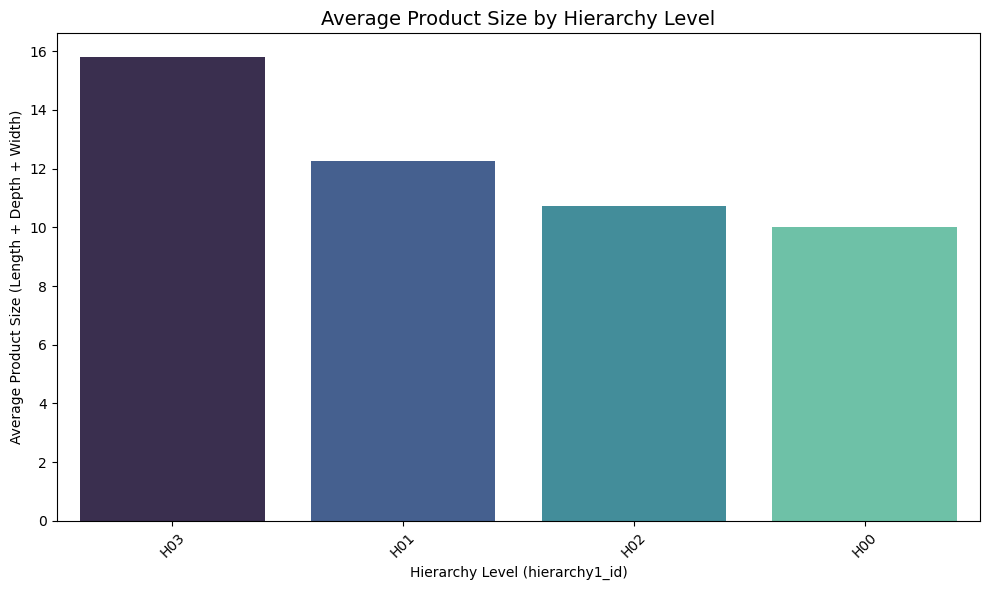

In [33]:
plt.figure(figsize=(10,6))
sns.barplot(data=hierarchy_summary, x='hierarchy1_id', y='avg_size', palette='mako')
plt.title('Average Product Size by Hierarchy Level', fontsize=14)
plt.xlabel('Hierarchy Level (hierarchy1_id)')
plt.ylabel('Average Product Size (Length + Depth + Width)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#Task 8 – Correlation Analysis
numeric_cols = ['product_length', 'product_depth', 'product_width']
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

                product_length  product_depth  product_width
product_length        1.000000       0.568729       0.598037
product_depth         0.568729       1.000000       0.517275
product_width         0.598037       0.517275       1.000000


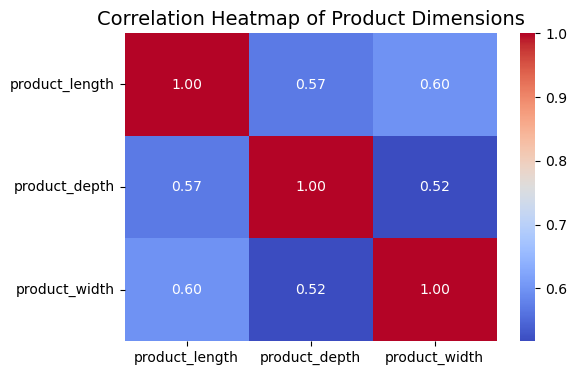

In [35]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Product Dimensions', fontsize=14)
plt.show()

In [36]:
#Task 9 – Cluster or Hierarchy Insights
df[['product_length', 'product_depth', 'product_width']] = df[['product_length', 'product_depth', 'product_width']].fillna(df[['product_length', 'product_depth', 'product_width']].mean())
df[['product_length', 'product_depth', 'product_width']] 

,product_length,product_depth,product_width
0,5.000000,20.000000,12.000000
1,13.500000,22.000000,20.000000
2,22.000000,40.000000,22.000000
3,2.000000,13.000000,4.000000
4,16.000000,30.000000,16.000000
...,...,...,...
694,2.000000,7.000000,7.000000
695,7.232305,18.460908,13.454758
696,1.000000,1.000000,1.000000
697,23.000000,23.000000,33.300000


In [37]:
df['product_volume'] = df['product_length'] * df['product_depth'] * df['product_width']
df['product_volume'] 

0       1200.000000
1       5940.000000
2      19360.000000
3        104.000000
4       7680.000000
           ...     
694       98.000000
695     1796.411041
696        1.000000
697    17615.700000
698      279.072000
Name: product_volume, Length: 699, dtype: float64

In [40]:
cluster_summary = df.groupby('cluster_id')['product_volume'].mean().reset_index()
cluster_summary = cluster_summary.sort_values(by='product_volume', ascending=False)
cluster_summary

,cluster_id,product_volume
7,cluster_6,26822.323643
1,cluster_0,8071.679279
10,cluster_9,5254.944082
5,cluster_4,2502.990417
0,Unknown,2488.383974
2,cluster_1,2156.507750
4,cluster_3,1309.608129
6,cluster_5,1245.706154
3,cluster_2,924.866667
9,cluster_8,763.252071


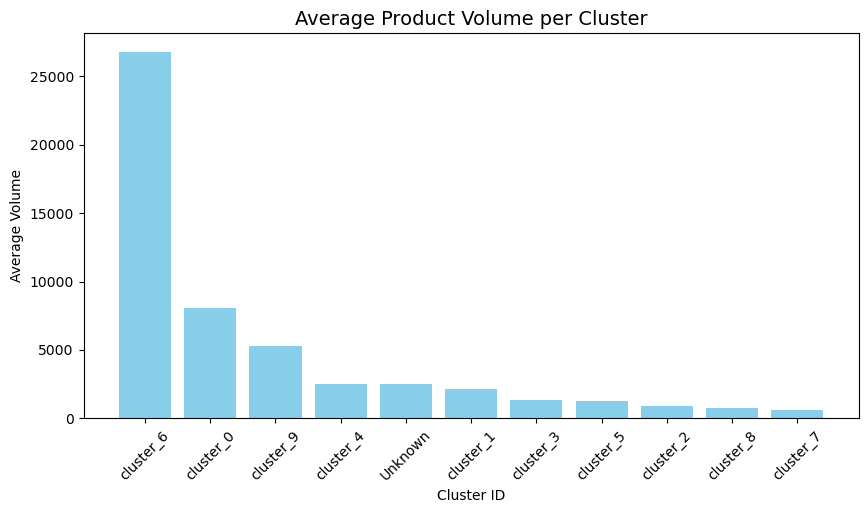

In [41]:
plt.figure(figsize=(10,5))
plt.bar(cluster_summary['cluster_id'], cluster_summary['product_volume'], color='skyblue')
plt.xticks(rotation=45)
plt.title("Average Product Volume per Cluster", fontsize=14)
plt.xlabel("Cluster ID")
plt.ylabel("Average Volume")
plt.show()

In [42]:
#Task 10 – Outlier Detection (Based on Product Volume)
Q1 = df['product_volume'].quantile(0.25)
Q3 = df['product_volume'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['product_volume'] < lower_bound) | (df['product_volume'] > upper_bound)]
outliers

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id,product_volume
1,P0001,13.5,22.0,20.0,cluster_5,H01,H0105,H010501,H01050100,H0105010006,5940.0
2,P0002,22.0,40.0,22.0,cluster_0,H03,H0315,H031508,H03150800,H0315080028,19360.0
4,P0005,16.0,30.0,16.0,cluster_9,H03,H0312,H031211,H03121109,H0312110917,7680.0
13,P0014,32.5,6.0,33.0,cluster_0,H03,H0313,H031302,H03130205,H0313020501,6435.0
20,P0021,8.0,26.0,23.0,cluster_0,H03,H0313,H031302,H03130210,H0313021002,4784.0
...,...,...,...,...,...,...,...,...,...,...,...
657,P0703,26.0,26.0,26.0,cluster_0,H03,H0314,H031407,H03140702,H0314070201,17576.0
673,P0720,47.8,80.0,47.8,cluster_0,H01,H0106,H010601,H01060112,H0106011208,182787.2
681,P0729,19.0,23.0,20.0,cluster_0,H03,H0315,H031508,H03150800,H0315080020,8740.0
687,P0736,70.0,165.0,36.0,cluster_0,H01,H0107,H010702,H01070200,H0107020004,415800.0


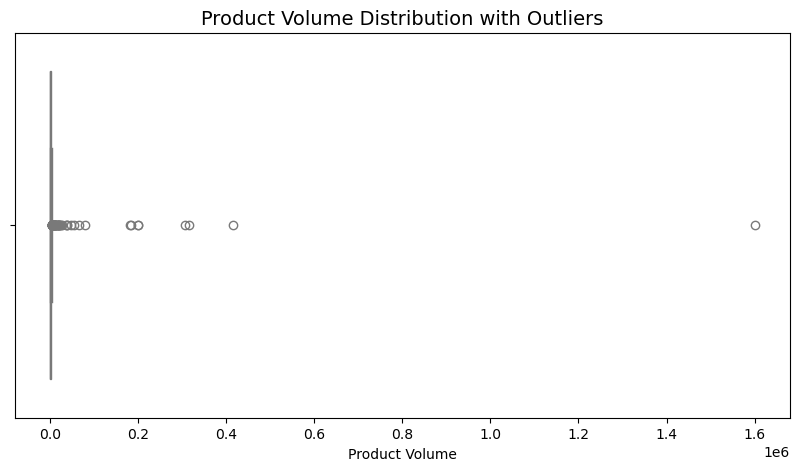

In [43]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['product_volume'], color='lightblue')
plt.title("Product Volume Distribution with Outliers", fontsize=14)
plt.xlabel("Product Volume")
plt.show()

In [45]:
clean = df[(df['product_volume'] >= lower_bound) & (df['product_volume'] <= upper_bound)]
clean

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id,product_volume
0,P0000,5.000000,20.000000,12.000000,Unknown,H00,H0004,H000401,H00040105,H0004010534,1200.000000
3,P0004,2.000000,13.000000,4.000000,cluster_3,H03,H0314,H031405,H03140500,H0314050003,104.000000
5,P0006,8.500000,15.000000,15.000000,cluster_0,H03,H0316,H031608,H03160817,H0316081708,1912.500000
6,P0007,2.000000,22.000000,9.500000,cluster_4,H03,H0313,H031305,H03130519,H0313051904,418.000000
7,P0008,5.000000,16.000000,5.000000,cluster_0,H00,H0000,H000004,H00000400,H0000040017,400.000000
...,...,...,...,...,...,...,...,...,...,...,...
693,P0742,6.400000,7.000000,6.400000,cluster_0,H01,H0108,H010811,H01081100,H0108110038,286.720000
694,P0744,2.000000,7.000000,7.000000,Unknown,H03,H0311,H031108,H03110802,H0311080202,98.000000
695,P0745,7.232305,18.460908,13.454758,cluster_0,H02,H0209,H020908,H02090804,H0209080422,1796.411041
696,P0746,1.000000,1.000000,1.000000,cluster_0,H03,H0314,H031407,H03140702,H0314070202,1.000000


In [48]:
print("\nBefore Cleaning:", df.shape[0], "rows")
print("After Removing Outliers:", clean.shape[0], "rows")


Before Cleaning: 699 rows
After Removing Outliers: 616 rows


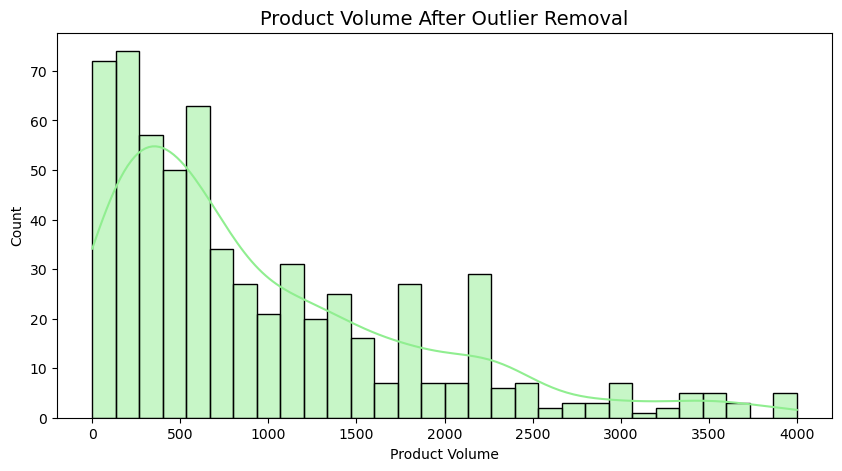

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(clean['product_volume'], bins=30, kde=True, color='lightgreen')
plt.title("Product Volume After Outlier Removal", fontsize=14)
plt.xlabel("Product Volume")
plt.ylabel("Count")
plt.show()